In [9]:
Text = "They are very common in conversational spoken English."

In [36]:
import nltk 
import pandas as pd
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
stop_list = stopwords.words('english')

print(stop_list[:5])

['i', 'me', 'my', 'myself', 'we']


In [17]:
remove_list = ['no', 'nor', 'not']
for i in remove_list:
  stop_list.remove(i)

In [18]:
print('length of the list before additions:', len(stop_list))
#Include the greetings as well
extra_list = ['sorry', 'please', 'kindly', 'good', 'morning', 'afternoon', 'evening',
              'thank', 'thanks']
stop_list.extend(extra_list)

print('length of the list after additions:', len(stop_list))


length of the list before additions: 176
length of the list after additions: 185


In [21]:
import nltk
nltk.download('punkt') # download the tokenizer

def stopword_remove(x):
  list1 = [str(word.lower()) for word in nltk.word_tokenize(x) if word not in stop_list]  
  return ' '.join(list1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [24]:
print('Before removing stop words:', Text)
print('\nAfter removing stop words:', stopword_remove(Text))

Before removing stop words: They are very common in conversational spoken English.

After removing stop words: they common conversational spoken english .


In [39]:
#let's create a dataframe, that has some 6 texts 

text_df = pd.DataFrame(['loggin issue', 'front camera not working', 'user id incorrect', 'password issue', 'password not accepted','password incorrect error'
], columns=['error_description'])

In [40]:
text_df

,error_description
0,loggin issue
1,front camera not working
2,user id incorrect
3,password issue
4,password not accepted
5,password incorrect error


In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [55]:
def display_words(x, y): #x => description, y=> number represent how many words
    tokenizer = Tokenizer(lower=True, split=' ', char_level=False, oov_token=None, document_count=0)
    tokenizer.fit_on_texts(x)
    word_list = tokenizer.word_index
    print('The length of the word list:', len(word_list))

    #extract keys and store it in list in python
    dict_keys = word_list.keys()
    key_list = []


    for key in dict_keys:
      key_list.append(key)

    print(key_list)
    
    if y > 0:            
      wordcloud = WordCloud(width = 1000, height = 500, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text = ' '.join(key_list[:y]))
    else:
      wordcloud = WordCloud(width = 1000, height = 500, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text = ' '.join(key_list[y:]))

    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off') 

The length of the word list: 12
['password', 'issue', 'not', 'incorrect', 'loggin', 'front', 'camera', 'working', 'user', 'id', 'accepted', 'error']


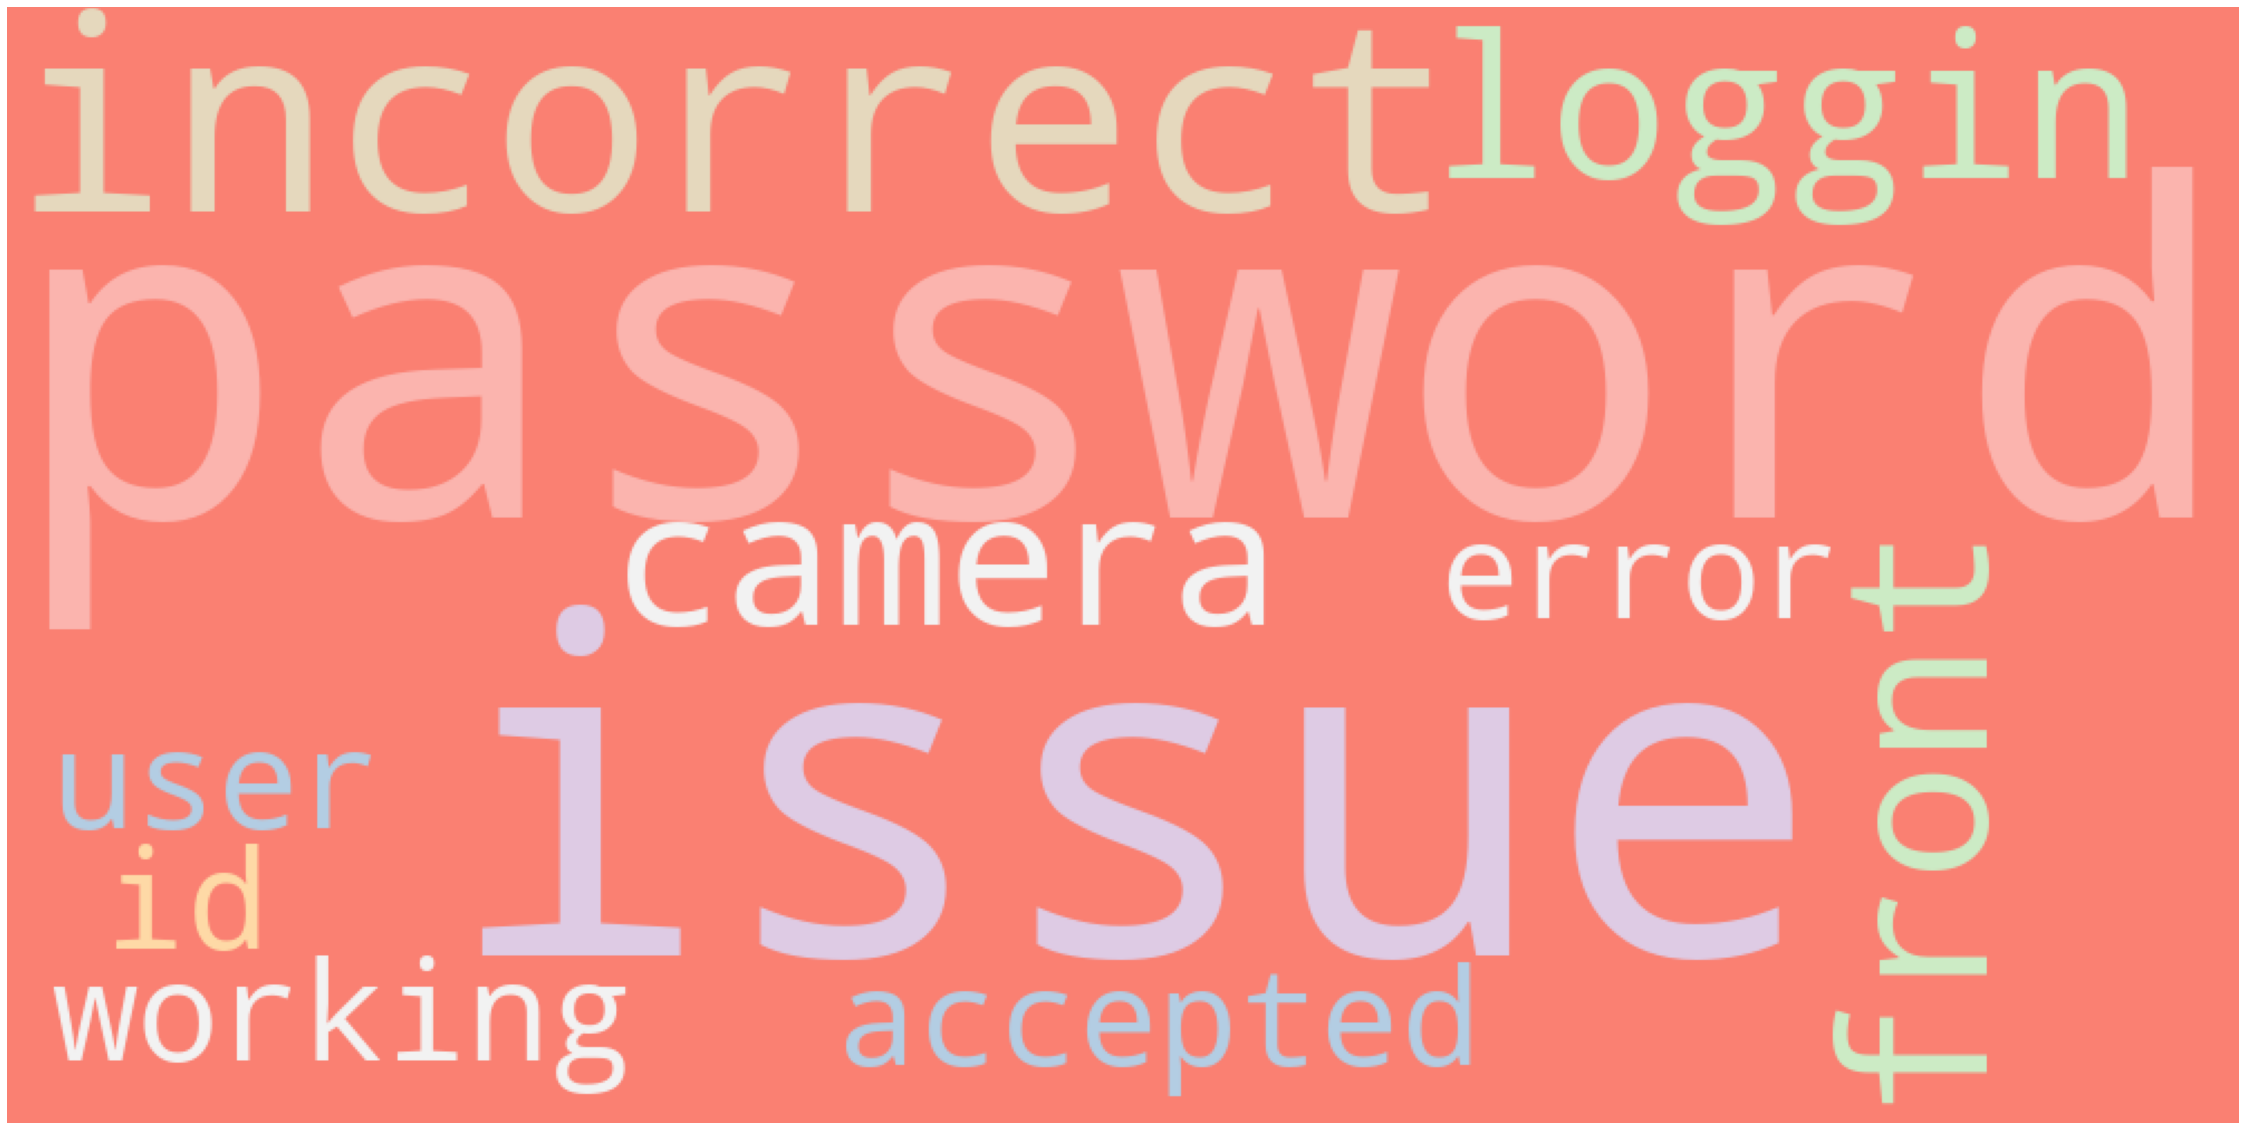

In [56]:
#let is display the most frequent words used in the description
Text = text_df['error_description']
y = 0
display_words(Text, y)